# Point source on top  of a halfspace

**Overview:** We are going to play with the solutions for a concentrated force located at $(0,0,0)$. Positive $z$ is inside the medium.

In [1]:
from __future__ import division
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [2]:
%matplotlib notebook

gray = '#757575'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["text.color"] = gray
plt.rcParams["xtick.color"] = gray
plt.rcParams["ytick.color"] = gray
plt.rcParams["axes.labelcolor"] = gray
plt.rcParams["axes.edgecolor"] = gray

init_printing()

In [3]:
x, y, z, r, E, nu, Fx, Fy, Fz = symbols('x y z r E nu F1 F2 F3')

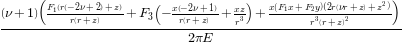

In [4]:
ux = (1+nu)/(2*pi*E)*((x*z/r**3 - (1-2*nu)*x/(r*(r + z)))*Fz +
                       (2*(1 - nu)*r + z)/(r*(r + z))*Fx +
                       ((2*r*(nu*r + z) + z**2)*x)/(r**3*(r + z)**2)*(x*Fx + y*Fy))
ux

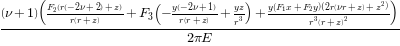

In [5]:
uy = (1+nu)/(2*pi*E)*((y*z/r**3 - (1-2*nu)*y/(r*(r + z)))*Fz +
                       (2*(1 - nu)*r + z)/(r*(r + z))*Fy +
                       ((2*r*(nu*r + z) + z**2)*y)/(r**3*(r + z)**2)*(x*Fx + y*Fy))
uy

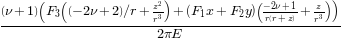

In [6]:
uz = (1+nu)/(2*pi*E)*((2*(1 - nu)/r + z**2/r**3)*Fz +
                       ((1 - 2*nu)/(r*(r + z)) + z/r**3)*(x*Fx + y*Fy))
uz

Withouth loss of generality we can assume that $F_y=0$, this is equivalent a rotate the axes until the force is in the plane $y=0$.

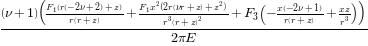

In [7]:
ux = ux.subs(Fy, 0)
ux

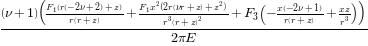

In [8]:
uy = ux.subs(Fy, 0)
uy

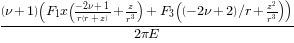

In [9]:
uz = uz.subs(Fy, 0)
uz

The displacement vector is then

In [10]:
u = Matrix([ux, uy, uz]).subs(r, sqrt(x**2 + y**2 + z**2))

Let us check if the displacement vanish when $x,y,z \rightarrow \infty$

In [11]:
u.limit(x, oo)


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [12]:
u.limit(y, oo)


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [13]:
u.limit(z, oo)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [14]:
def sym_grad(u, x):
    """Compute the symmetric gradient of u wrt to x"""
    return Matrix(3, 3, lambda i,j:
                  S(1)/2*(diff(u[i], x[j]) + diff(u[j], x[i])))


def strain_to_stress(e, E, nu):
    """Strain to stress relation (Hooke's law)"""
    lamda = E*nu/((1 + nu)*(1 - 2*nu))
    mu = E/(2*(1 + nu))
    delta = eye(3)
    return Matrix(3, 3, lambda i,j: 
       lamda*(e[0,0] + e[1,1] + e[2,2])*delta[i,j] + 2*mu*e[i,j])

In [15]:
e = sym_grad(u, [x,y,z])

In [16]:
sigma = strain_to_stress(e, E, nu)

Let us check if the strains and stress components vanish when $x,y,z \rightarrow \infty$

In [17]:
check_strains = False
if check_strains:
    display(e.limit(x, oo))
    display(e.limit(y, oo))
    display(e.limit(z, oo))

In [18]:
check_stresses = False
if check_stresses:
    display(sigma.limit(x, oo))
    display(sigma.limit(y, oo))
    display(sigma.limit(z, oo))

## Visualization of the fields

In [19]:
x_vec, z_vec = np.mgrid[-2:2:100j, 0:5:100j]

In [20]:
def field_plot(expr, x_vec, y_vec, z_vec, E_val, nu_val, Fx_val, Fz_val, title=''):
    """Plot the field""" 
    
    # Lambdify the function
    expr_fun = lambdify((x, y, z, E, nu, Fx, Fz), expr, "numpy")
    expr_vec = expr_fun(x_vec, y_vec, z_vec, E_val, nu_val, Fx_val, Fz_val) 
    
    # Determine extrema
    vmin = np.min(expr_vec)
    vmax = np.max(expr_vec)
    print("Minimum value in the domain: {:g}".format(vmin))
    print("Maximum value in the domain: {:g}".format(vmax))
    vmax = max(np.abs(vmax), np.abs(vmin))
    
    # Plotting
    fig = plt.gcf()
    ax = plt.gca()
    levels = np.logspace(-1, np.log10(vmax), 10)
    levels = np.hstack((-levels[-1::-1], [0], levels))
    cbar_ticks = ["{:.2g}".format(level) for level in levels]
    cont = plt.contourf(x_vec, z_vec, expr_vec, levels=levels,
                        cmap="RdYlBu_r", norm=colors.SymLogNorm(0.1))
    cbar = fig.colorbar(cont, ticks=levels[::2])
    cbar.ax.set_yticklabels(cbar_ticks[::2])
    plt.axis("image")
    plt.gca().invert_yaxis()
    plt.xlabel(r"$x$")
    plt.ylabel(r"$z$")
    plt.title(title)
    return cont

### Displacements

<IPython.core.display.Javascript object>


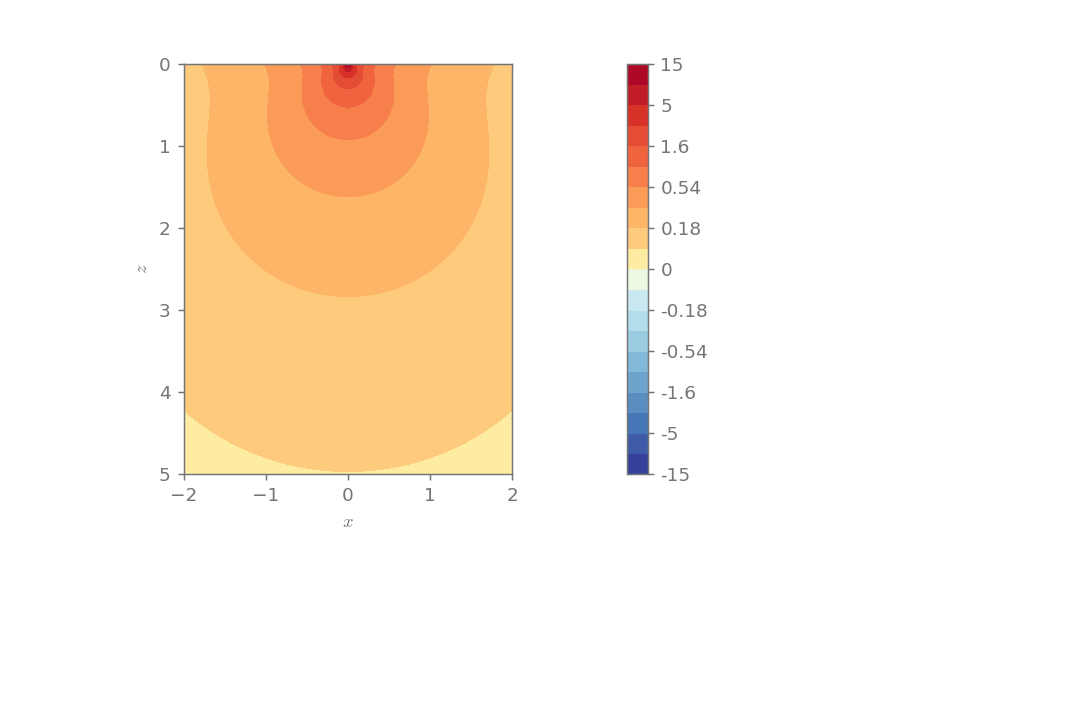

Minimum value in the domain: 0.0881197
Maximum value in the domain: 15.4645


In [23]:
umag = sqrt((u.T*u)[0])
plt.figure(figsize=(6, 4))
field_plot(umag, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


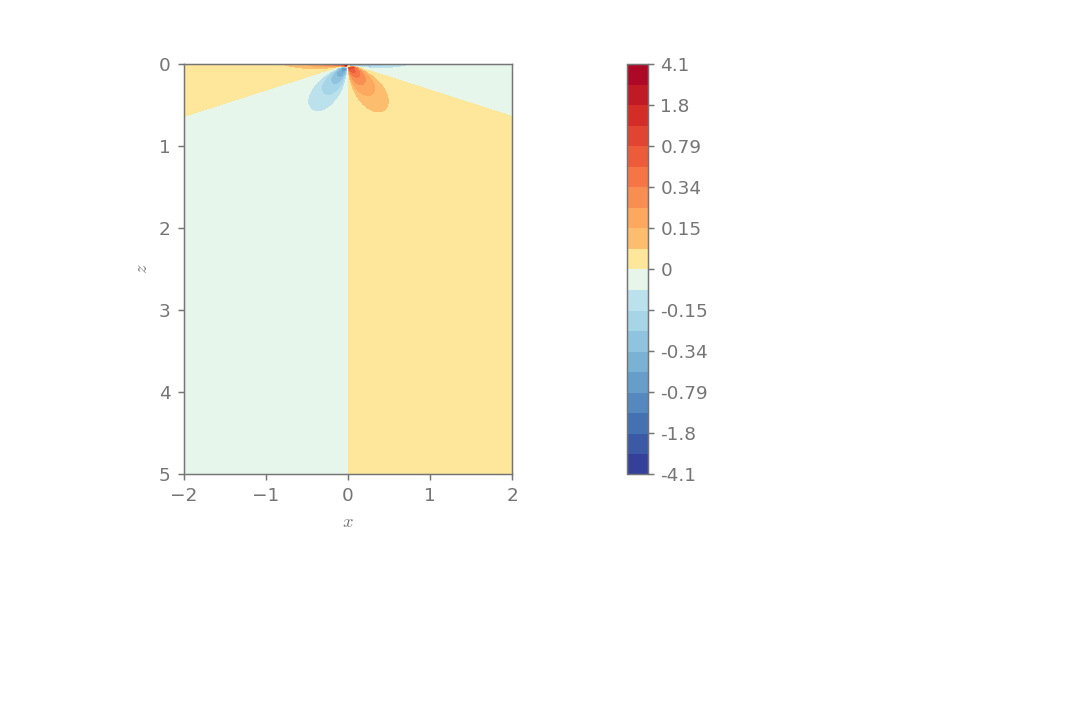

Minimum value in the domain: -4.09665
Maximum value in the domain: 4.09665


In [25]:
plt.figure(figsize=(6, 4))
field_plot(u[0], x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


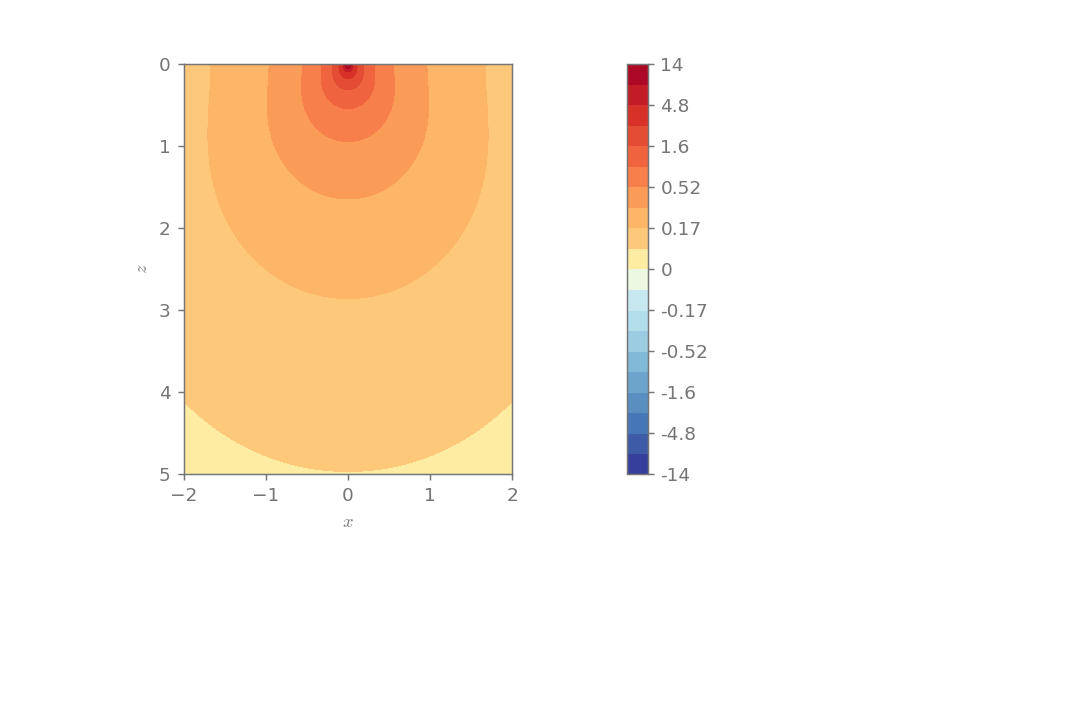

Minimum value in the domain: 0.0869101
Maximum value in the domain: 14.3383


In [26]:
plt.figure(figsize=(6, 4))
field_plot(u[2], x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

### Stresses

We can plot the components of stress

<IPython.core.display.Javascript object>


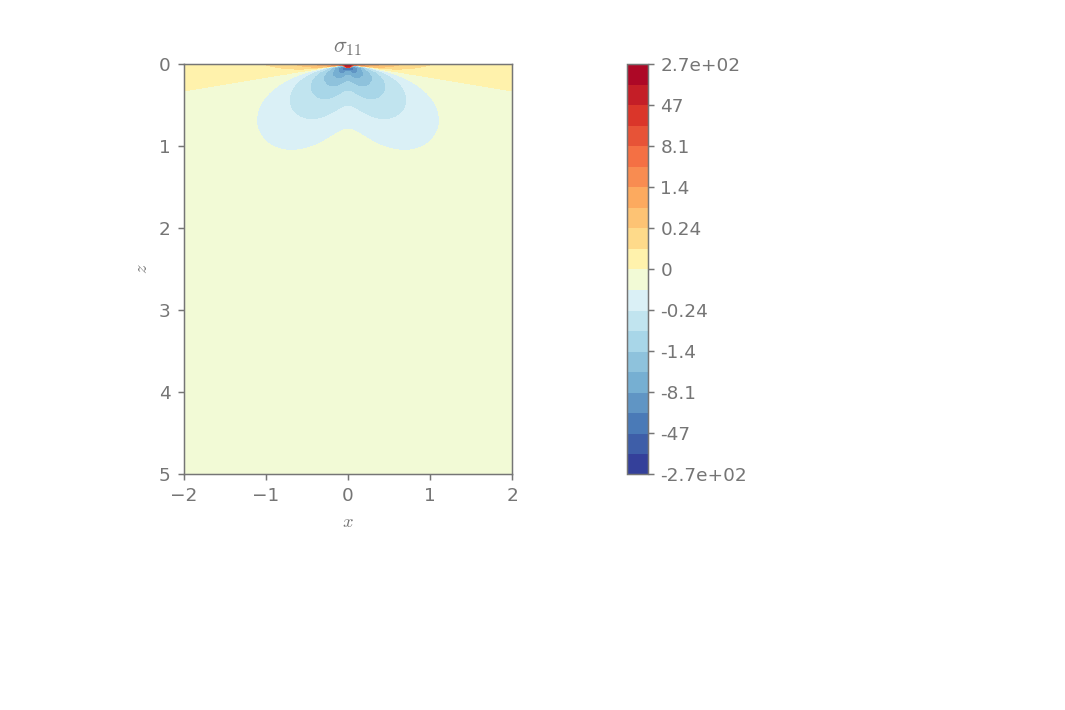

Minimum value in the domain: -38.5975
Maximum value in the domain: 272.979


<IPython.core.display.Javascript object>


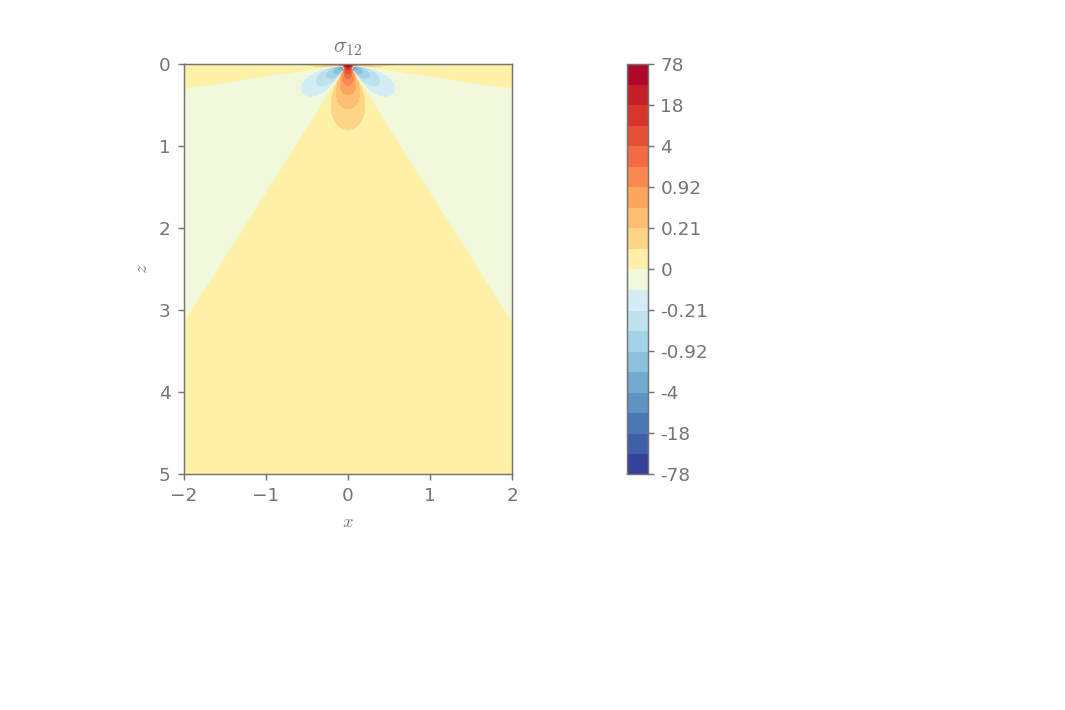

Minimum value in the domain: -6.4627
Maximum value in the domain: 77.9939


<IPython.core.display.Javascript object>


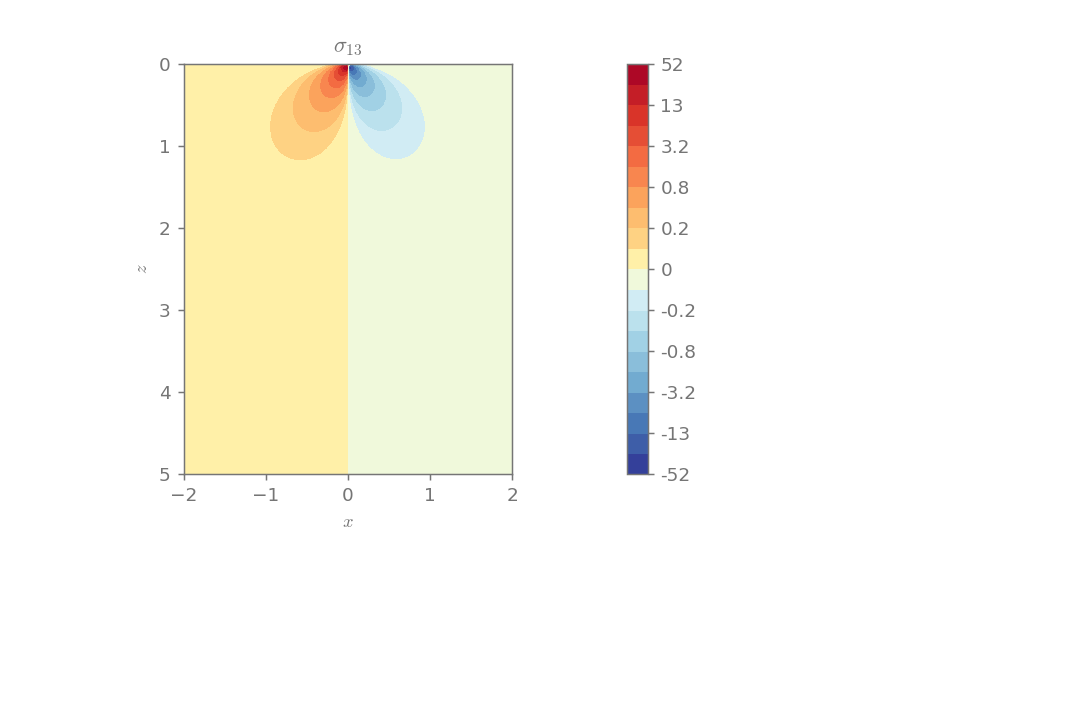

Minimum value in the domain: -51.6639
Maximum value in the domain: 51.6639


<IPython.core.display.Javascript object>


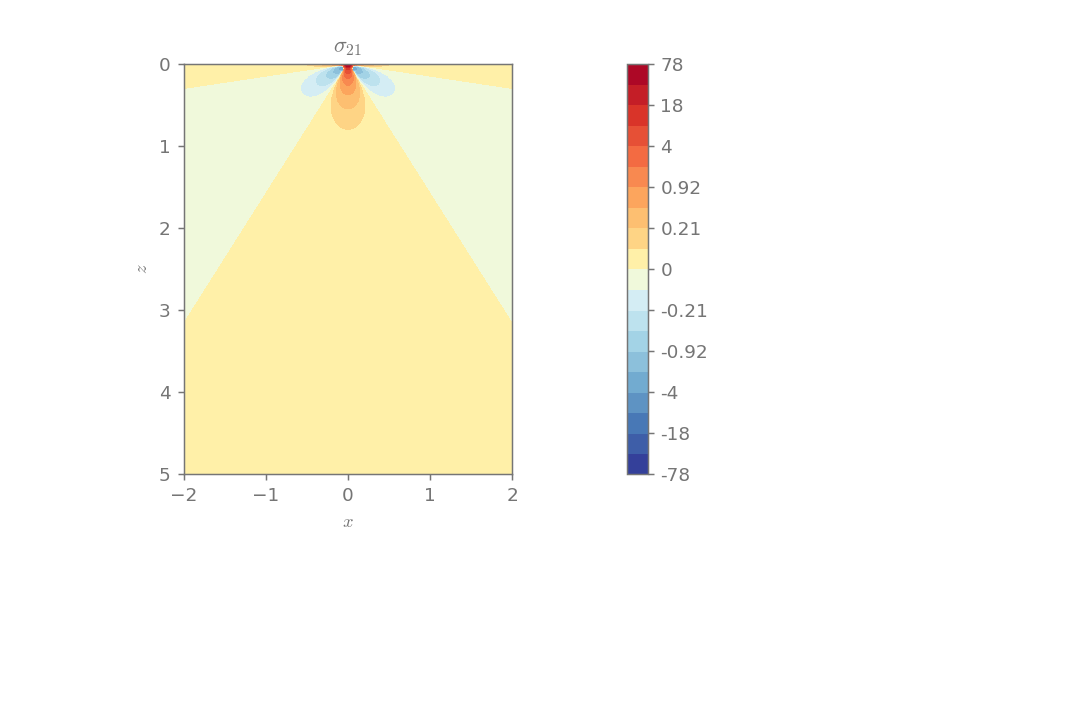

Minimum value in the domain: -6.4627
Maximum value in the domain: 77.9939


<IPython.core.display.Javascript object>


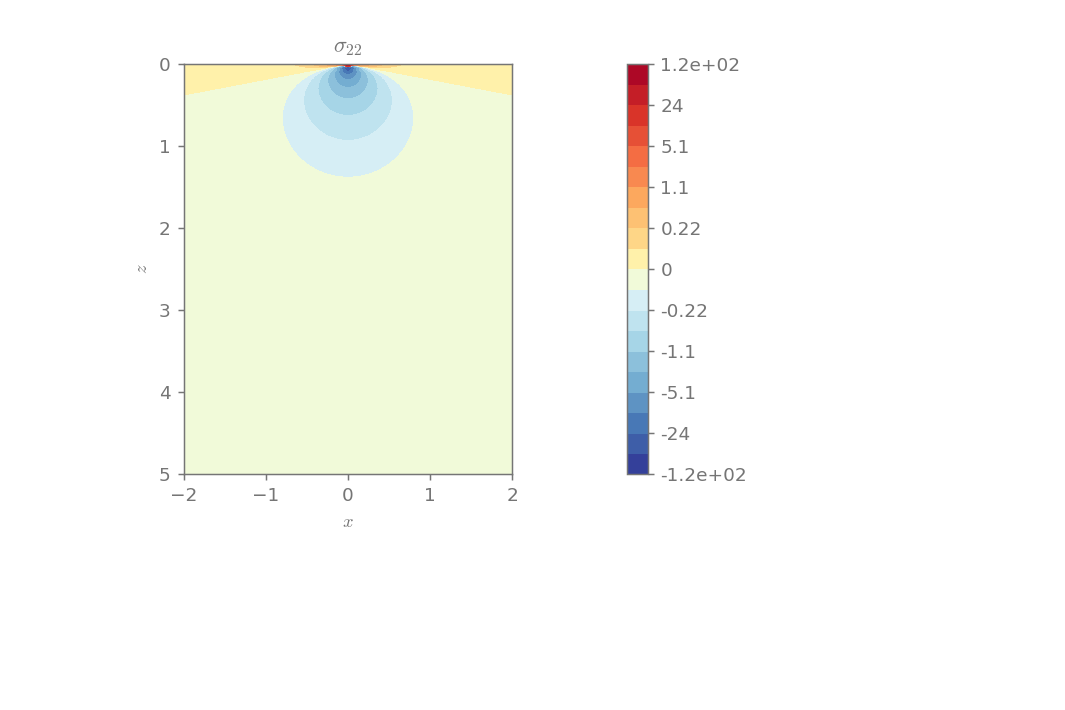

Minimum value in the domain: -59.0538
Maximum value in the domain: 116.991


<IPython.core.display.Javascript object>


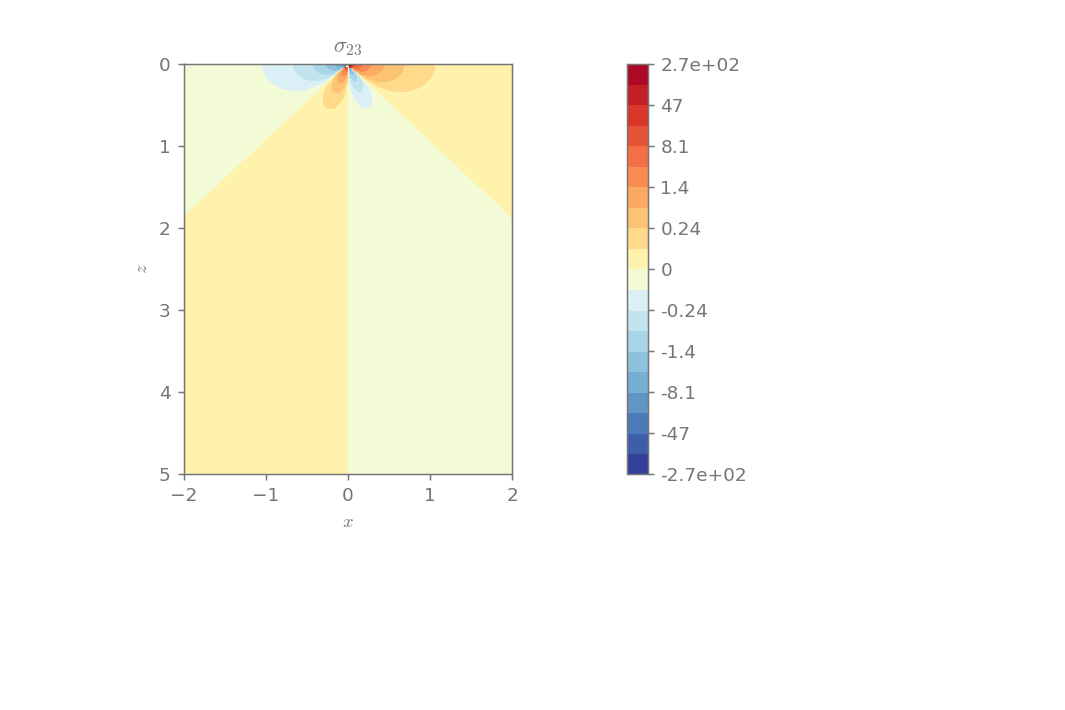

Minimum value in the domain: -272.979
Maximum value in the domain: 272.979


<IPython.core.display.Javascript object>


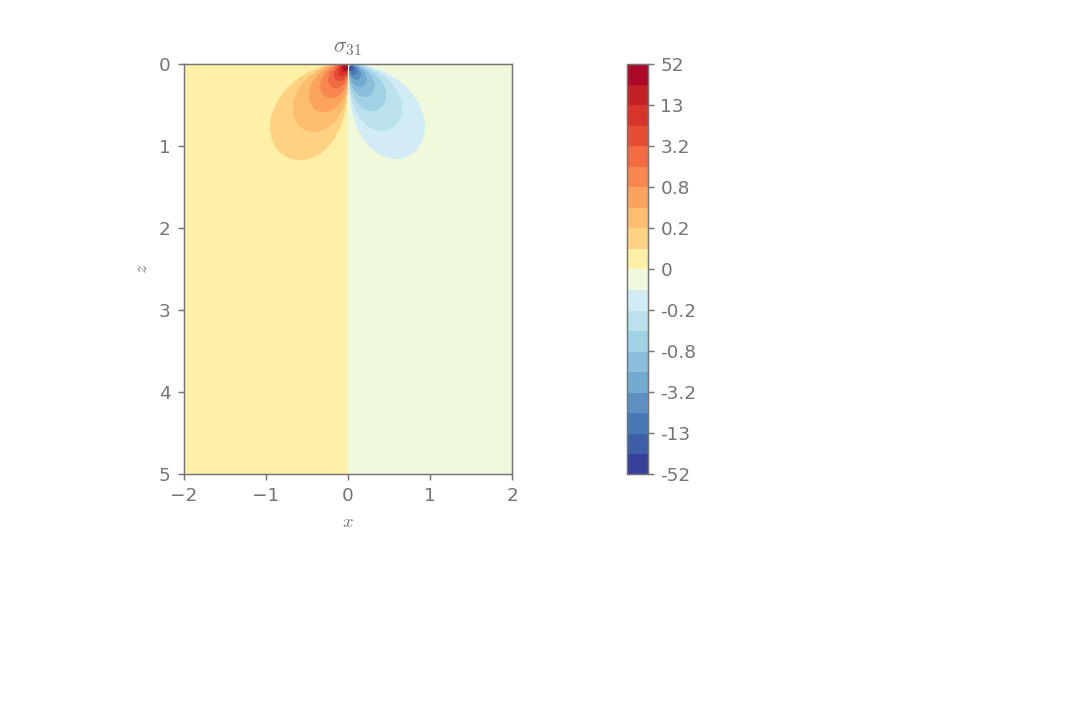

Minimum value in the domain: -51.6639
Maximum value in the domain: 51.6639


<IPython.core.display.Javascript object>


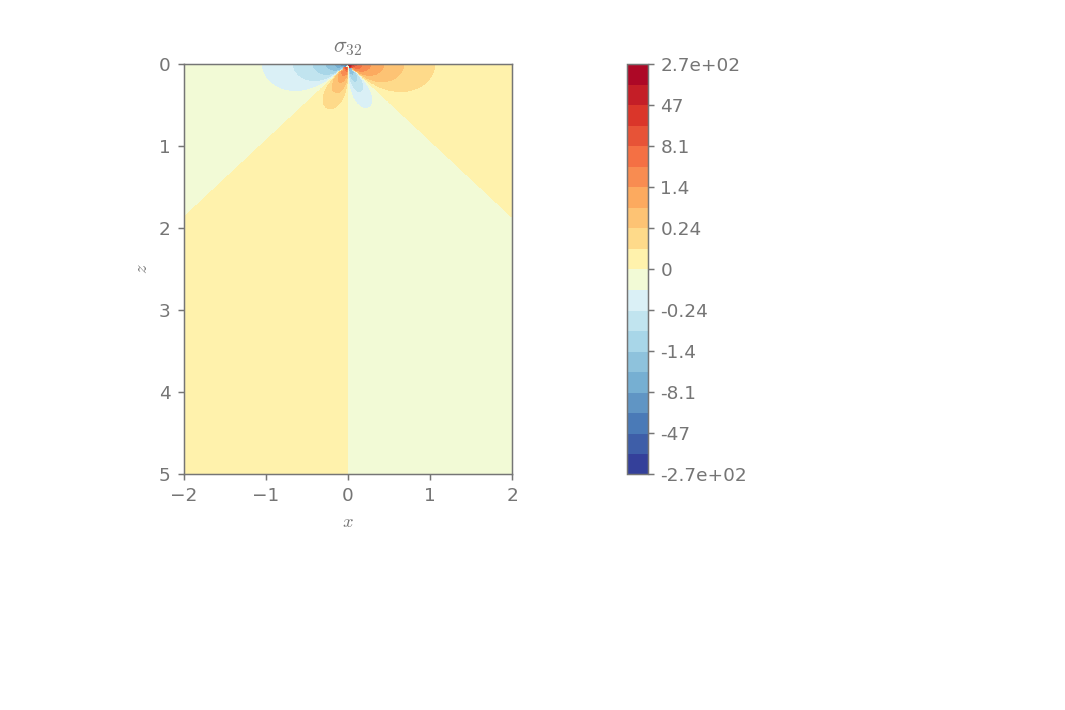

Minimum value in the domain: -272.979
Maximum value in the domain: 272.979


<IPython.core.display.Javascript object>


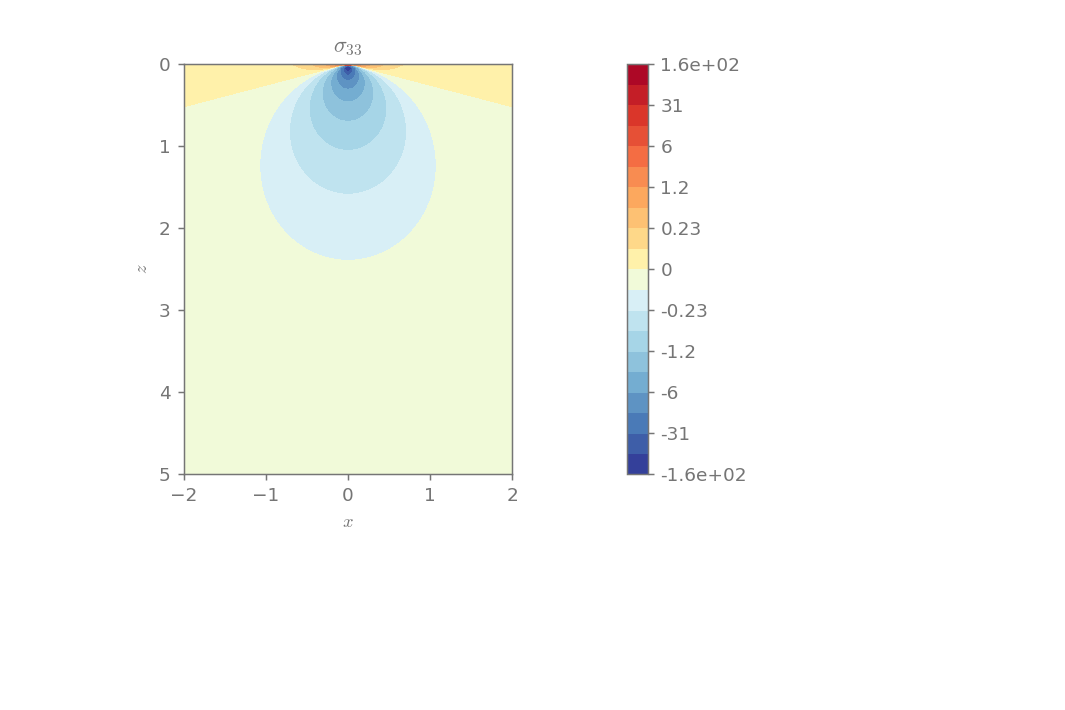

Minimum value in the domain: -158.248
Maximum value in the domain: 116.991


In [27]:
for row in range(0,3):
    for col in range(0,3):
        plt.figure(figsize=(6, 4))
        field_plot(sigma[row,col], x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0,
                   title=r"$\sigma_{%i%i}$"%(row+1, col+1))

plt.show()

## Stress invariants

We can also plot the invariants of the stress tensor

<IPython.core.display.Javascript object>


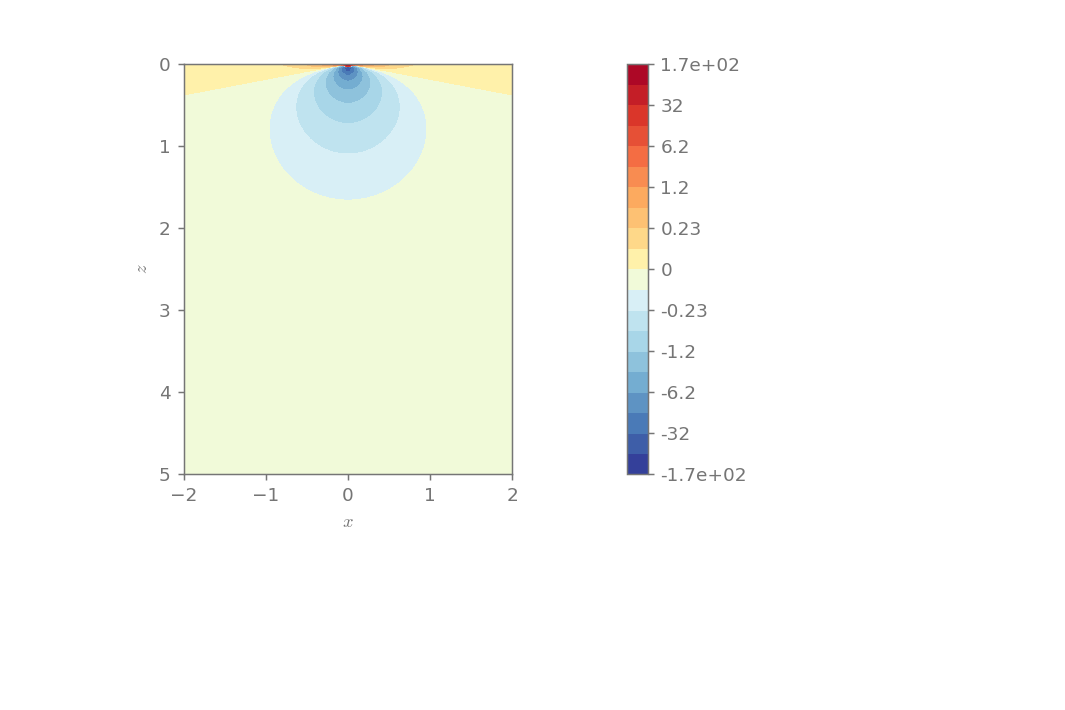

Minimum value in the domain: -85.2999
Maximum value in the domain: 168.987


In [28]:
I1 = S(1)/3*trace(sigma)
plt.figure(figsize=(6, 4))
field_plot(I1, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


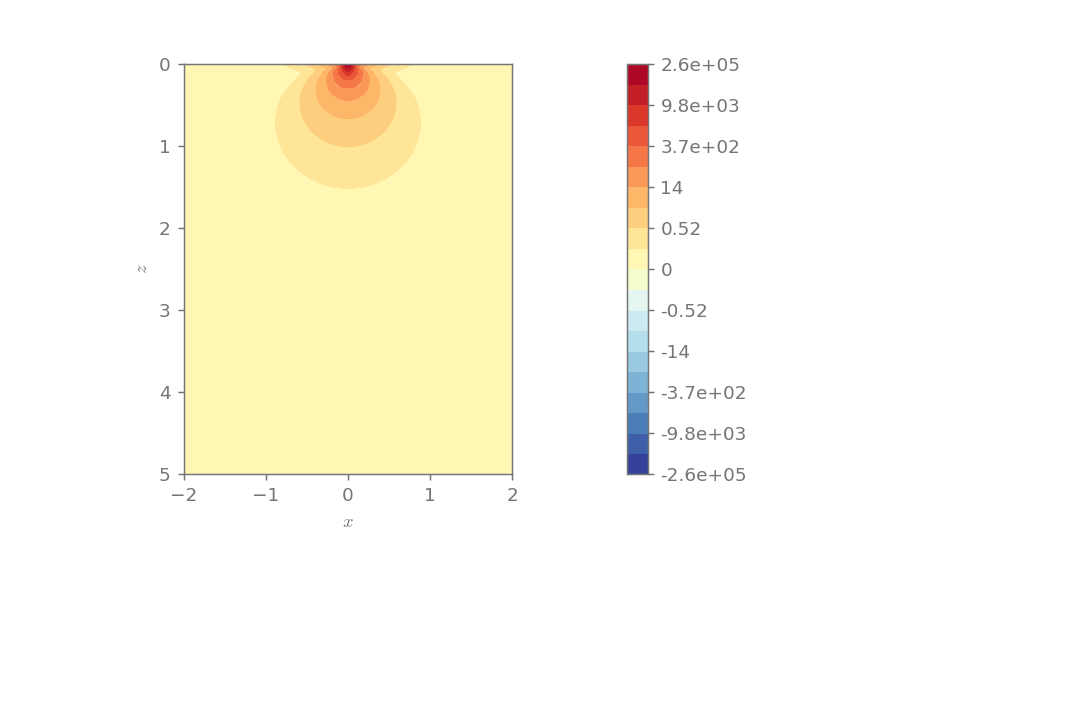

Minimum value in the domain: 0.000527446
Maximum value in the domain: 260050


In [29]:
I2 = S(1)/2*(trace(sigma)**2 + trace(sigma**2))
plt.figure(figsize=(6, 4))
field_plot(I2, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


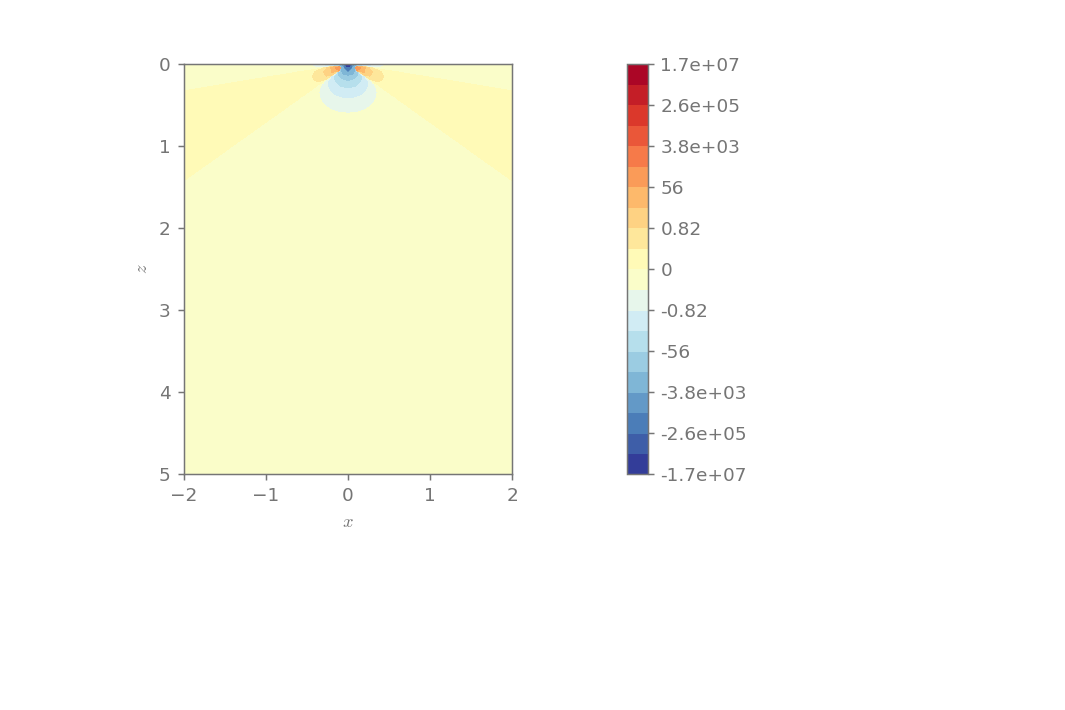

Minimum value in the domain: -1.73171e+07
Maximum value in the domain: 420.487


In [30]:
I3 = sigma.det()
plt.figure(figsize=(6, 4))
field_plot(I3, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


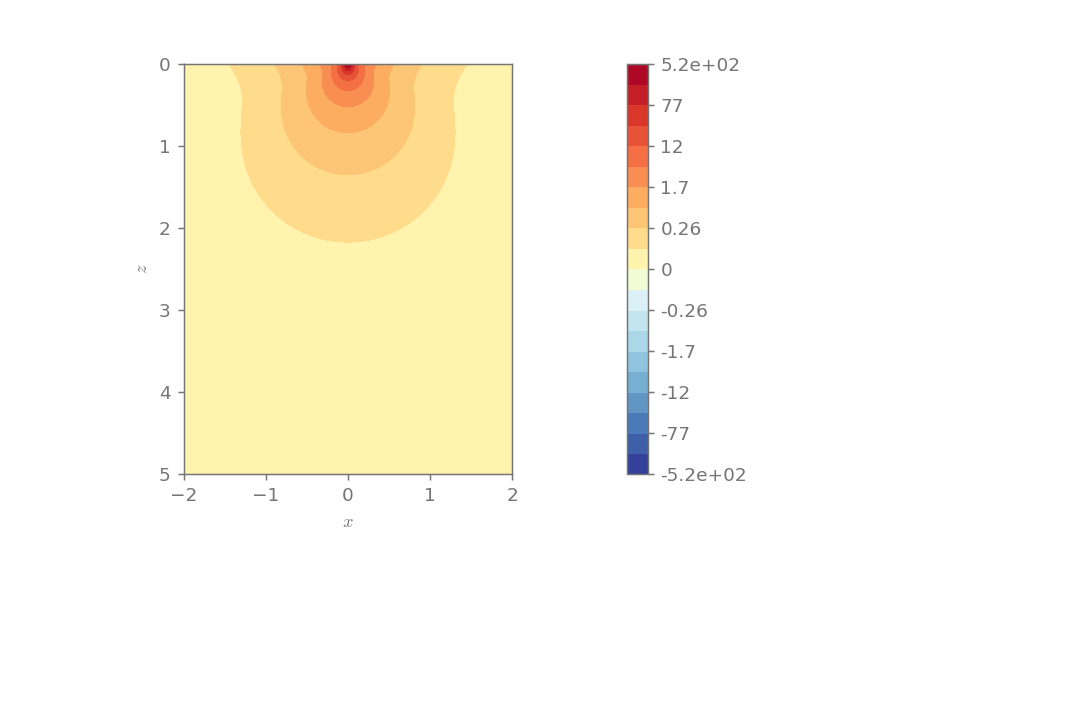

Minimum value in the domain: 0.014796
Maximum value in the domain: 515.881


In [31]:
Mises = sqrt(((sigma[0,0] - sigma[1,1])**2 + (sigma[1,1] - sigma[2,2])**2 +
             (sigma[2,2] - sigma[0,0])**2 +
             6*(sigma[0,1]**2 + sigma[1,2]**2 + sigma[0,2]**2))/2)
plt.figure(figsize=(6, 4))
field_plot(Mises, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

In [32]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()